In [1]:
!pip install prophet

  Using cached cmdstanpy-1.3.0-py3-none-any.whl.metadata (4.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.1 MB/s eta 0:00:00
Using cached cmdstanpy-1.3.0-py3-none-any.whl (99 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")

df = df[['date', 'meantemp']].rename(columns={'date':'ds', 'meantemp':'y'})
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
model = Prophet(daily_seasonality=True)
model.fit(df)


In [5]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1487,2017-01-27,16.811902,14.204677,19.357604
1488,2017-01-28,16.832804,14.285208,19.412491
1489,2017-01-29,16.832264,14.156874,19.455747
1490,2017-01-30,17.150358,14.752105,19.660033
1491,2017-01-31,17.337487,14.728547,19.964319


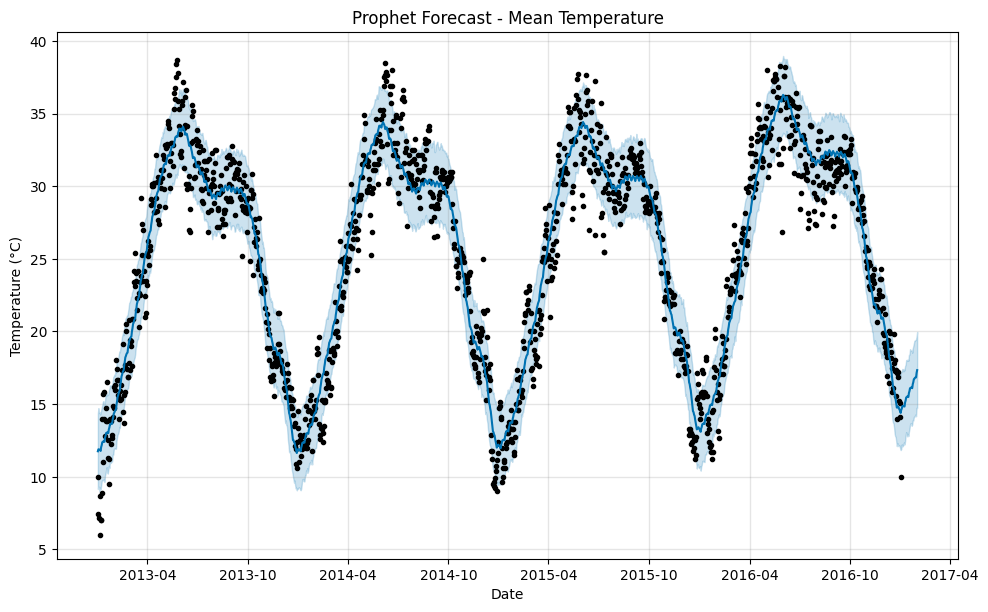

In [7]:
fig1 = model.plot(forecast)
plt.title("Prophet Forecast - Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


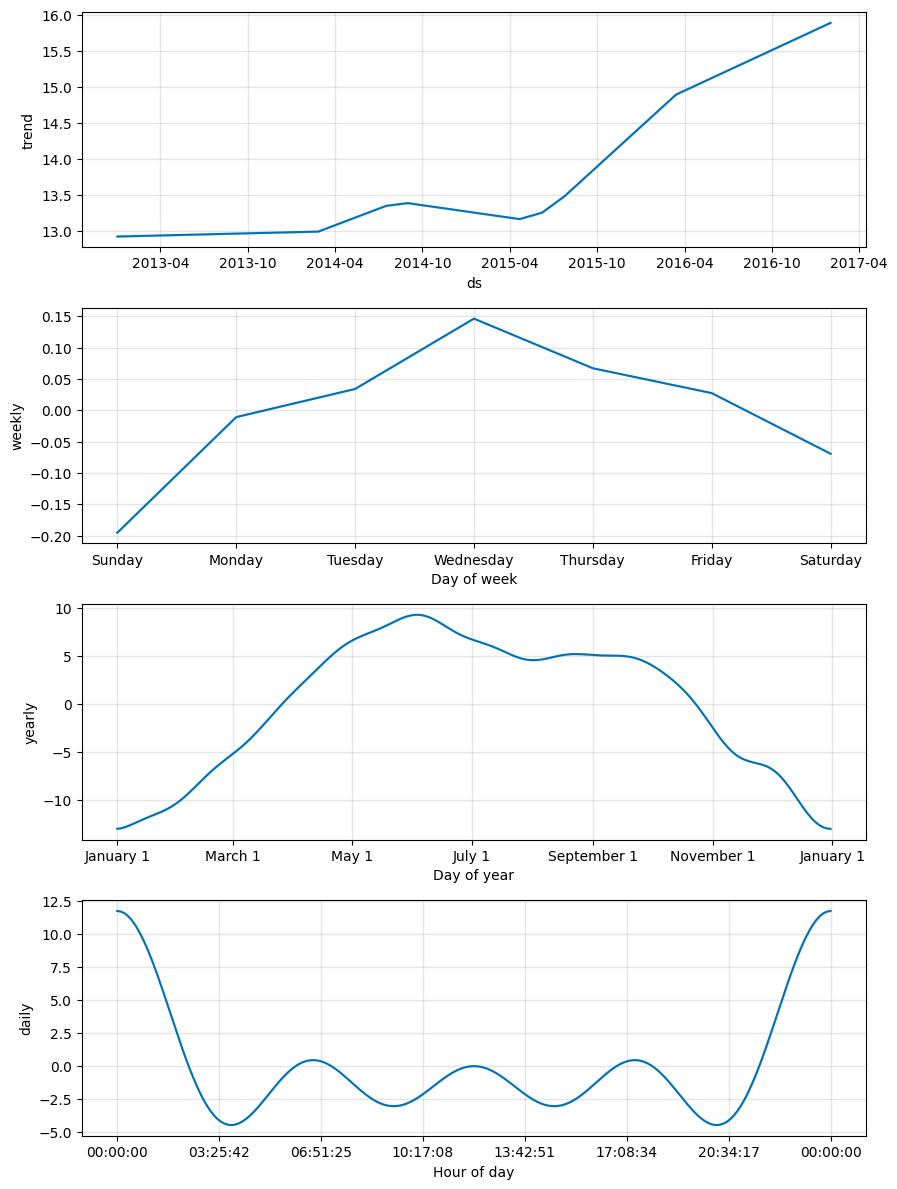

In [8]:
fig2 = model.plot_components(forecast)
plt.show()
